In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

## Exporing the data

In [2]:
df = pd.read_csv("heart.csv")
data = df.copy()
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
#separating discrete features from numerical features 
data_discrete = data[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']]
data_cont = data[['age','trestbps', 'chol', 'thalach', 'oldpeak']]



In [7]:
data_discrete

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,1,3,1,0,0,0,0,1,1
1,1,2,0,1,0,0,0,2,1
2,0,1,0,0,0,2,0,2,1
3,1,1,0,1,0,2,0,2,1
4,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,1,0,3,0
299,1,3,0,1,0,1,0,3,0
300,1,0,1,1,0,1,2,3,0
301,1,0,0,1,1,1,1,3,0


In [8]:
data_cont


,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
298,57,140,241,123,0.2
299,45,110,264,132,1.2
300,68,144,193,141,3.4
301,57,130,131,115,1.2


In [25]:
data_cont.shape

(303, 5)

In [11]:
data_cont.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], dtype='object')

## presence of outliers in the continous features

In [12]:
# define a function called plot_boxplot
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

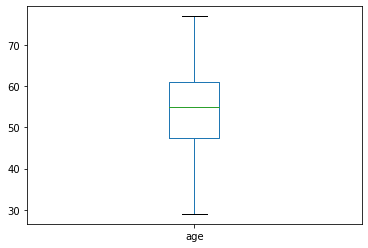

In [14]:
plot_boxplot(data_cont, 'age')

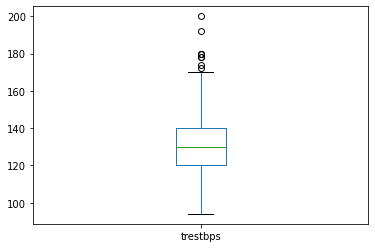

In [15]:
plot_boxplot(data_cont, 'trestbps')

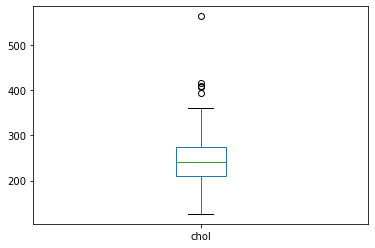

In [16]:
plot_boxplot(data_cont, 'chol')

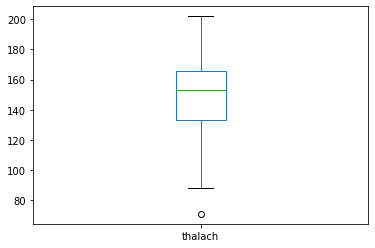

In [17]:
plot_boxplot(data_cont, 'thalach')

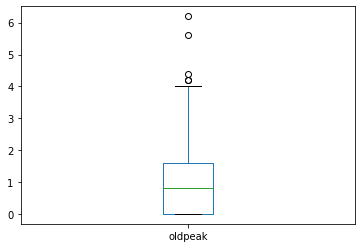

In [19]:
plot_boxplot(data_cont, 'oldpeak')

## Removing outliers

In [20]:
#define a function called "outliers " which returns a list of index of outliers
#IQR = Q#-Q1
#+/- 1.5*IQR
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound =Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls


In [22]:
#create an empty list to store the output indices from multiple columns
index_list = []
for feature in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']:
    index_list.extend(outliers(data, feature))
print(index_list)


[8, 101, 110, 203, 223, 241, 248, 260, 266, 28, 85, 96, 220, 246, 272, 101, 204, 221, 250, 291]


In [23]:
#define a function called 'remove' which returns a clean data frame without outlieers
def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df
    

In [24]:
data_cleaned = remove(data_cont, index_list)

In [26]:
data_cleaned.shape

(284, 5)

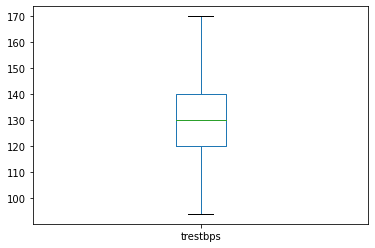

In [29]:
plot_boxplot(data_cleaned, 'trestbps')

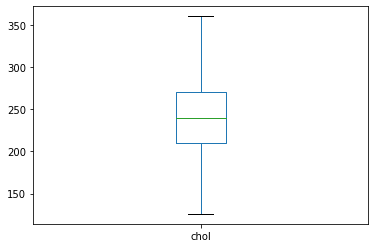

In [30]:
plot_boxplot(data_cleaned, 'chol')

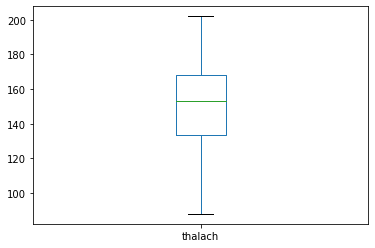

In [31]:
plot_boxplot(data_cleaned, 'thalach')

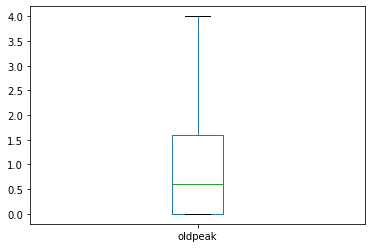

In [32]:
plot_boxplot(data_cleaned, 'oldpeak')

## Binning the continous column values apart from the old peak

In [89]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

le = LabelEncoder()

df1['age_binned'] = pd.qcut(df1.age, q=[0, .25, .50, .75, 1])
df1['thalach_binned'] = pd.qcut(df1.thalach, q=[0, .25, .50, .75, 1])
df1['chol_binned'] = pd.qcut(df1.chol, q=[0, .25, .50, .75, 1])
df1['trestbps_binned'] = pd.qcut(df1.trestbps, q=[0, .25, .50, .75, 1])

df1.drop(columns=['age', 'thalach', 'chol', 'trestbps'], inplace=True)
#apply labelencoder

df1['age'] = le.fit_transform(df1['age_binned'])
df1['thalach'] = le.fit_transform(df1['thalach_binned'])
df1['chol'] = le.fit_transform(df1['chol_binned'])
df1['trestbps'] = le.fit_transform(df1['trestbps_binned'])

df1.drop(columns=['age_binned','thalach_binned', 'chol_binned', 'trestbps_binned'],inplace=True)

df1

,sex,cp,fbs,restecg,exang,oldpeak,slope,ca,thal,target,age,thalach,chol,trestbps
0,1,3,1,0,0,2.3,0,0,1,1,3,1,1,3
1,1,2,0,1,0,3.5,0,0,2,1,0,3,2,1
2,0,1,0,0,0,1.4,2,0,2,1,0,3,0,1
3,1,1,0,1,0,0.8,2,0,2,1,2,3,1,0
4,0,0,0,1,1,0.6,2,0,2,1,2,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,0.2,1,0,3,0,2,0,2,2
299,1,3,0,1,0,1.2,1,0,3,0,0,0,2,0
300,1,0,1,1,0,3.4,1,2,3,0,3,1,0,3
301,1,0,0,1,1,1.2,1,1,3,0,2,0,0,1


In [90]:
df1

,sex,cp,fbs,restecg,exang,oldpeak,slope,ca,thal,target,age,thalach,chol,trestbps
0,1,3,1,0,0,2.3,0,0,1,1,3,1,1,3
1,1,2,0,1,0,3.5,0,0,2,1,0,3,2,1
2,0,1,0,0,0,1.4,2,0,2,1,0,3,0,1
3,1,1,0,1,0,0.8,2,0,2,1,2,3,1,0
4,0,0,0,1,1,0.6,2,0,2,1,2,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,0.2,1,0,3,0,2,0,2,2
299,1,3,0,1,0,1.2,1,0,3,0,0,0,2,0
300,1,0,1,1,0,3.4,1,2,3,0,3,1,0,3
301,1,0,0,1,1,1.2,1,1,3,0,2,0,0,1


In [1]:
cols = df1.columns.tolist()
print(cols)

NameError: name 'df1' is not defined

In [96]:
#the target column should come last
df1 = df1[['sex', 'cp', 'fbs', 'restecg',
           'exang', 'oldpeak', 'slope',
           'ca', 'thal', 'age', 'thalach', 'chol', 'trestbps', 'target']]
df1


,sex,cp,fbs,restecg,exang,oldpeak,slope,ca,thal,age,thalach,chol,trestbps,target
0,1,3,1,0,0,2.3,0,0,1,3,1,1,3,1
1,1,2,0,1,0,3.5,0,0,2,0,3,2,1,1
2,0,1,0,0,0,1.4,2,0,2,0,3,0,1,1
3,1,1,0,1,0,0.8,2,0,2,2,3,1,0,1
4,0,0,0,1,1,0.6,2,0,2,2,2,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,0.2,1,0,3,2,0,2,2,0
299,1,3,0,1,0,1.2,1,0,3,0,0,2,0,0
300,1,0,1,1,0,3.4,1,2,3,3,1,0,3,0
301,1,0,0,1,1,1.2,1,1,3,2,0,0,1,0


In [98]:
df1.dtypes

sex           int64
cp            int64
fbs           int64
restecg       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
age           int32
thalach       int32
chol          int32
trestbps      int32
target        int64
dtype: object

In [102]:
df1.drop(columns = ['oldpeak']) 


,sex,cp,fbs,restecg,exang,slope,ca,thal,age,thalach,chol,trestbps,target
0,1,3,1,0,0,0,0,1,3,1,1,3,1
1,1,2,0,1,0,0,0,2,0,3,2,1,1
2,0,1,0,0,0,2,0,2,0,3,0,1,1
3,1,1,0,1,0,2,0,2,2,3,1,0,1
4,0,0,0,1,1,2,0,2,2,2,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,1,0,3,2,0,2,2,0
299,1,3,0,1,0,1,0,3,0,0,2,0,0
300,1,0,1,1,0,1,2,3,3,1,0,3,0
301,1,0,0,1,1,1,1,3,2,0,0,1,0


In [107]:
## Separating features from the labels using the most appropriate techniques
features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'thalach', 'chol', 'trestbps']
label = ['target']
X, y = df1[features].values, df1[label].values


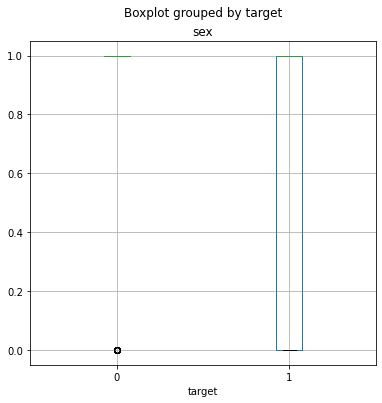

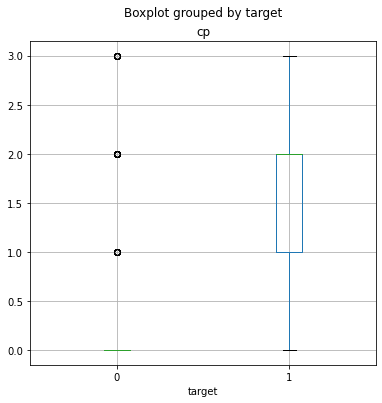

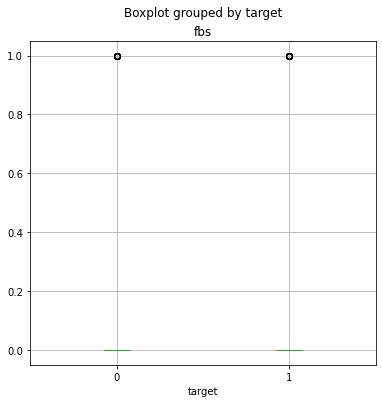

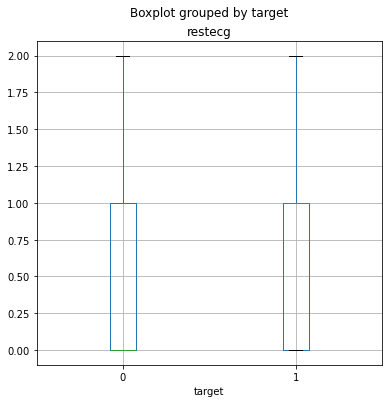

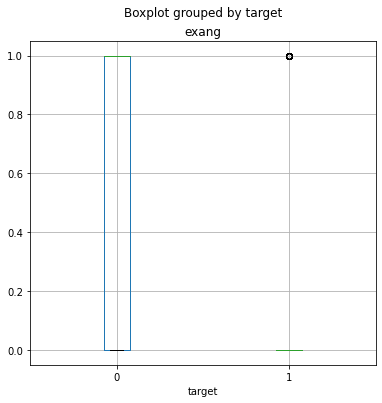

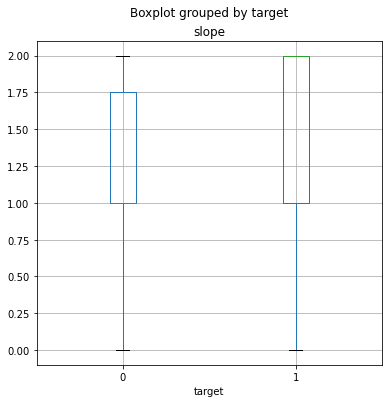

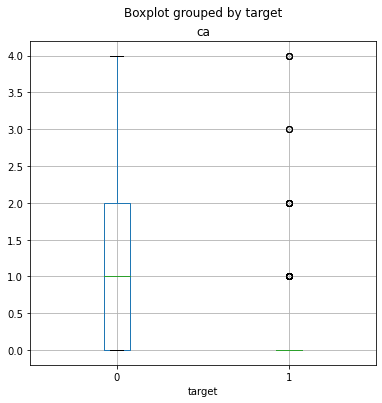

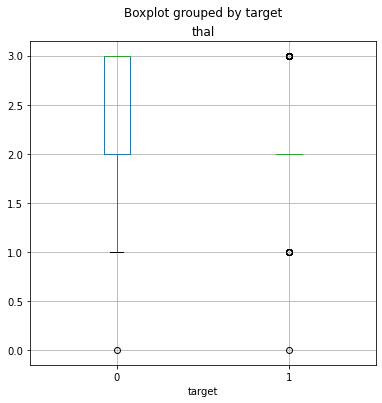

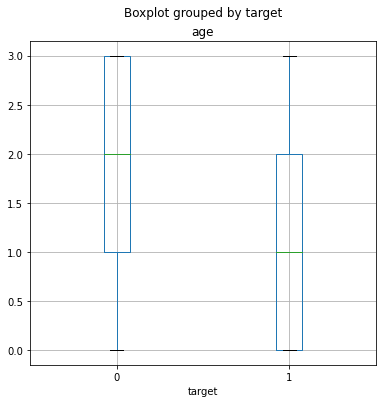

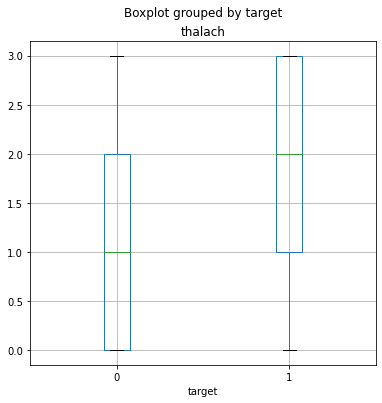

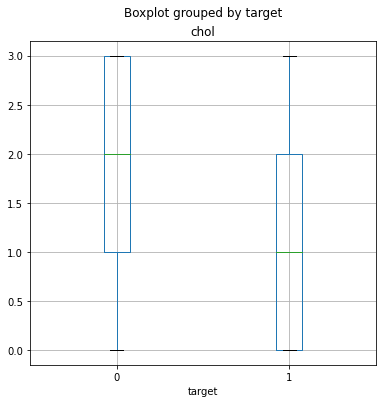

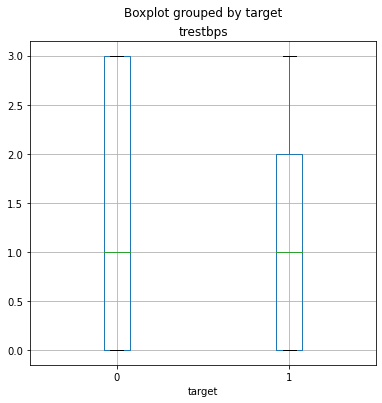

In [110]:
for col in features:
    df1.boxplot(column=col, by='target', figsize=(6,6))
    plt.title(col)
plt.show()
                                                 